In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import json
from transformers import pipeline
import math
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [5]:
data = pd.read_csv('transformed.csv')
data = data.drop(['Unnamed: 0'],axis = 1)

In [6]:
data

,item_id,waist,size,quality,cup size,hips,bra size,bust,height,fit,...,shoe size,shoe width,review_text,bottoms,dresses,new,outerwear,sale,tops,wedding
0,123373,29.0,7,5.0,4.0,38.0,34.0,36.0,167.64,0,...,NaN,NaN,NaN,0,0,1,0,0,0,0
1,123373,31.0,13,3.0,2.0,30.0,36.0,NaN,157.48,0,...,NaN,NaN,NaN,0,0,1,0,0,0,0
2,123373,30.0,7,2.0,2.0,NaN,32.0,NaN,170.18,0,...,9.0,NaN,NaN,0,0,1,0,0,0,0
3,123373,NaN,21,5.0,5.0,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,0,0,1,0,0,0,0
4,123373,NaN,18,5.0,2.0,NaN,36.0,NaN,157.48,0,...,NaN,NaN,NaN,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,8,4.0,2.0,NaN,36.0,NaN,172.72,1,...,8.5,2.0,1.0,0,0,0,1,0,0,0
82786,807722,NaN,12,5.0,6.0,NaN,34.0,NaN,165.10,0,...,NaN,NaN,1.0,0,0,0,1,0,0,0
82787,807722,NaN,12,5.0,7.0,36.0,32.0,NaN,162.56,1,...,NaN,NaN,1.0,0,0,0,1,0,0,0
82788,807722,NaN,12,4.0,NaN,NaN,NaN,NaN,160.02,1,...,NaN,NaN,1.0,0,0,0,1,0,0,0


In [7]:
data.describe()

,item_id,waist,size,quality,cup size,hips,bra size,bust,height,fit,...,shoe size,shoe width,review_text,bottoms,dresses,new,outerwear,sale,tops,wedding
count,82790.000000,2882.000000,82790.000000,82722.000000,76535.000000,56064.000000,76772.000000,11854.000000,81683.000000,82790.000000,...,27915.000000,18607.000000,70522.000000,82790.000000,82790.000000,82790.000000,82790.000000,82790.000000,82790.000000,82790.000000
mean,469325.229170,31.319223,12.661602,3.949058,3.678696,40.358501,35.972125,37.499241,165.471906,0.685554,...,8.145818,2.129306,0.789853,0.184394,0.225269,0.259548,0.051009,0.030487,0.245972,0.003322
std,213999.803314,5.302849,8.271952,0.992783,1.651061,5.827166,3.224907,4.635117,7.245308,0.464298,...,1.336109,0.528602,0.407416,0.387808,0.417762,0.438389,0.220017,0.171923,0.430664,0.057538
min,123373.000000,20.000000,0.000000,1.000000,0.500000,30.000000,28.000000,20.000000,91.440000,0.000000,...,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,314980.000000,28.000000,8.000000,3.000000,2.000000,36.000000,34.000000,34.000000,160.020000,0.000000,...,7.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,454030.000000,30.000000,12.000000,4.000000,4.000000,39.000000,36.000000,36.000000,165.100000,1.000000,...,8.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,658440.000000,34.000000,15.000000,5.000000,5.000000,43.000000,38.000000,40.000000,170.180000,1.000000,...,9.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,807722.000000,50.000000,38.000000,5.000000,11.000000,60.000000,48.000000,59.000000,241.300000,1.000000,...,38.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

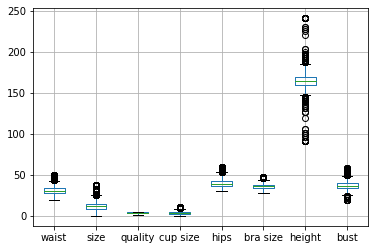

In [8]:
data.boxplot(column=['waist', 'size','quality','cup size','hips','bra size','height','bust']) 

In [9]:
def norm(df):
    for feature in ['waist','size','quality','cup size','bust','hips','bra size','height','shoe size','shoe width']:
        df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
    return df

In [10]:
norm_data = norm(data)

In [11]:
norm_data

,item_id,waist,size,quality,cup size,hips,bra size,bust,height,fit,...,shoe size,shoe width,review_text,bottoms,dresses,new,outerwear,sale,tops,wedding
0,123373,0.300000,0.184211,1.00,0.333333,0.266667,0.3,0.410256,0.508475,0,...,NaN,NaN,NaN,0,0,1,0,0,0,0
1,123373,0.366667,0.342105,0.50,0.142857,0.000000,0.4,NaN,0.440678,0,...,NaN,NaN,NaN,0,0,1,0,0,0,0
2,123373,0.333333,0.184211,0.25,0.142857,NaN,0.2,NaN,0.525424,0,...,0.121212,NaN,NaN,0,0,1,0,0,0,0
3,123373,NaN,0.552632,1.00,0.428571,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,0,0,1,0,0,0,0
4,123373,NaN,0.473684,1.00,0.142857,NaN,0.4,NaN,0.440678,0,...,NaN,NaN,NaN,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,807722,NaN,0.210526,0.75,0.142857,NaN,0.4,NaN,0.542373,1,...,0.106061,0.5,1.0,0,0,0,1,0,0,0
82786,807722,NaN,0.315789,1.00,0.523810,NaN,0.3,NaN,0.491525,0,...,NaN,NaN,1.0,0,0,0,1,0,0,0
82787,807722,NaN,0.315789,1.00,0.619048,0.200000,0.2,NaN,0.474576,1,...,NaN,NaN,1.0,0,0,0,1,0,0,0
82788,807722,NaN,0.315789,0.75,NaN,NaN,NaN,NaN,0.457627,1,...,NaN,NaN,1.0,0,0,0,1,0,0,0


<AxesSubplot:>

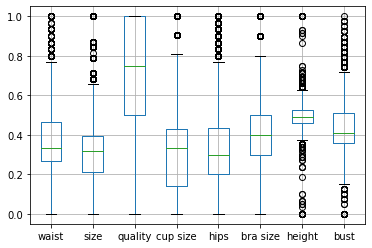

In [12]:
norm_data.boxplot(column=['waist', 'size','quality','cup size','hips','bra size','height','bust']) 

In [16]:
labels = norm_data.iloc[:,[9]]
features = norm_data.drop(['fit','item_id','user_id'],axis = 1)

In [17]:
labels

,fit
0,0
1,0
2,0
3,1
4,0
...,...
82785,1
82786,0
82787,1
82788,1


In [18]:
features

,waist,size,quality,cup size,hips,bra size,bust,height,shoe size,shoe width,review_text,bottoms,dresses,new,outerwear,sale,tops,wedding
0,0.300000,0.184211,1.00,0.333333,0.266667,0.3,0.410256,0.508475,NaN,NaN,NaN,0,0,1,0,0,0,0
1,0.366667,0.342105,0.50,0.142857,0.000000,0.4,NaN,0.440678,NaN,NaN,NaN,0,0,1,0,0,0,0
2,0.333333,0.184211,0.25,0.142857,NaN,0.2,NaN,0.525424,0.121212,NaN,NaN,0,0,1,0,0,0,0
3,NaN,0.552632,1.00,0.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0
4,NaN,0.473684,1.00,0.142857,NaN,0.4,NaN,0.440678,NaN,NaN,NaN,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,NaN,0.210526,0.75,0.142857,NaN,0.4,NaN,0.542373,0.106061,0.5,1.0,0,0,0,1,0,0,0
82786,NaN,0.315789,1.00,0.523810,NaN,0.3,NaN,0.491525,NaN,NaN,1.0,0,0,0,1,0,0,0
82787,NaN,0.315789,1.00,0.619048,0.200000,0.2,NaN,0.474576,NaN,NaN,1.0,0,0,0,1,0,0,0
82788,NaN,0.315789,0.75,NaN,NaN,NaN,NaN,0.457627,NaN,NaN,1.0,0,0,0,1,0,0,0


In [19]:
imputer = KNNImputer(n_neighbors=10)
transformed_features = imputer.fit_transform(features)

In [20]:
transformed_features.shape

(82790, 18)

In [21]:
transformed_features = pd.DataFrame(transformed_features, columns = features.columns)

In [22]:
transformed_features

,waist,size,quality,cup size,hips,bra size,bust,height,shoe size,shoe width,review_text,bottoms,dresses,new,outerwear,sale,tops,wedding
0,0.300000,0.184211,1.00,0.333333,0.266667,0.30,0.410256,0.508475,0.090909,0.60,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.366667,0.342105,0.50,0.142857,0.000000,0.40,0.433333,0.440678,0.075758,0.65,0.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.333333,0.184211,0.25,0.142857,0.250000,0.20,0.338462,0.525424,0.121212,0.50,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.600000,0.552632,1.00,0.428571,0.386667,0.56,0.625641,0.505085,0.128788,0.55,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.496667,0.473684,1.00,0.142857,0.463333,0.40,0.512821,0.440678,0.083333,0.60,0.9,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82785,0.360000,0.210526,0.75,0.142857,0.236667,0.40,0.369231,0.542373,0.106061,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
82786,0.306667,0.315789,1.00,0.523810,0.300000,0.30,0.466667,0.491525,0.098485,0.60,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
82787,0.260000,0.315789,1.00,0.619048,0.200000,0.20,0.438462,0.474576,0.100000,0.55,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
82788,0.376667,0.315789,0.75,0.342857,0.360000,0.38,0.482051,0.457627,0.078788,0.55,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

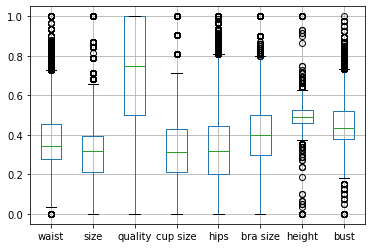

In [23]:
transformed_features.boxplot(column=['waist', 'size','quality','cup size','hips','bra size','height','bust']) 

In [24]:
transformed_features.to_csv('filled.csv')

In [25]:
pca = PCA(n_components=3)
points = pca.fit_transform(transformed_features.iloc[:,0:9])

In [26]:
points

array([[-0.21156961, -0.25885226,  0.07874025],
       [-0.20445941,  0.24023872, -0.12868275],
       [-0.29079678,  0.49021063, -0.08393456],
       ...,
       [-0.15265323, -0.25599325,  0.37851632],
       [-0.00462259, -0.01275672,  0.0466515 ],
       [-0.29244565, -0.00747702,  0.10809557]])

In [27]:
x = points[:,0][:100]
y = points[:,1][:100]
z = points[:,2][:100]
l = labels.to_numpy().reshape(82790)[:100]

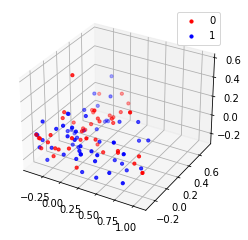

In [28]:
cdict = {0: 'red', 1: 'blue'}

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for g in np.unique(l):
    ix = np.where(l == g)
    ax.scatter(x[ix], y[ix], z[ix], c = cdict[g], label = g, s = 10)
ax.legend()
plt.show()

In [29]:
x_train = transformed_features.to_numpy()[:60000]
y_train = labels.to_numpy()[:60000].flatten()

x_test = transformed_features.to_numpy()[60000:]
y_test = labels.to_numpy()[60000:].flatten()

In [30]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [31]:
pred = clf.predict(x_test)

In [32]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [33]:
(pred == y_test).sum() / len(pred)

0.7109697235629662

In [34]:
roc_auc_score(y_test,pred)

0.5960156855041324

In [196]:
KNN_cls = KNeighborsClassifier(n_neighbors=10)

In [197]:
KNN_cls.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [198]:
pred = KNN_cls.predict(x_test)

In [201]:
(pred == y_test).sum() / len(pred)

0.6852128126371215

In [200]:
roc_auc_score(y_test,pred)

0.5773063016976012